<a href="https://colab.research.google.com/github/dlwogns/ML-DL/blob/main/Digit%20Recognizer/Digit_Recognizer(0_994).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [39]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/digit-recognizer/test.csv")

In [40]:
y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

In [41]:
X_train = X_train/255.0
test = test/255.0

In [42]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1, 28,28,1)
# reshape에 -1이 들어가면 "원래 배열의 길이와 남은 차원으로 부터 추정"의 의미로, auto랑 비슷하게 쓰면 되는거 같음.
# 28 * 28 * 1의 3차원으로 만드는 이유는 CNN의 구조 때문.

In [43]:
# Label Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [44]:
# split training and validiation set
X_train, X_val, Y_train , Y_val = train_test_split(X_train, y_train, test_size = 0.1)

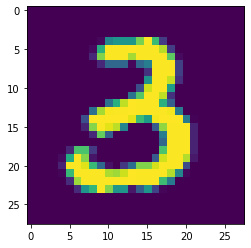

In [45]:
plt.imshow(X_train[0][:,:,0])

In [46]:
# Data Augmentation
# for avoiding overfitting
# 1. Data Augmentation
# 2. Dropout
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False
)
datagen.fit(X_train)

In [82]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

In [55]:
learning_rate = 0.001
training_epochs = 30
batch_size = 128

In [99]:
tf.model = tf.keras.Sequential()
# Conv2D filter에 대하여
# https://www.youtube.com/watch?v=aircAruvnKk&embeds_euri=https%3A%2F%2F89douner.tistory.com%2F57&feature=emb_imp_woyt
# filters는 각 이미지에서 edge에 대한 정보를 얼마나 가져올 것 인지를 의미한다.
# 개수는 임의로 지정하는 것이며, 보통 16, 32 등 2^를 많이 사용하는 것 같은데 왜그런지 찾고있다.
# filter의 개수가 input의 개수와 같으면 FNN으로 일반적인 DNN과 같다.
# CNN의 장점이 DNN보다 인자가 현저히 작다는 것이다. conv2d와 maxpooling을 이용해 특징을 기반으로 이미지를 분류하기 때문이다.(위의 동영상 참조)

In [100]:
#layer 1
tf.model.add(Conv2D(filters=32, kernel_size = (5,5), input_shape=(28,28,1), activation='relu'))
tf.model.add(Conv2D(filters=32, kernel_size = (5,5), input_shape=(28,28,1), activation='relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2)))
tf.model.add(Dropout(0.5))

In [101]:
#layer 2
tf.model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
tf.model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
tf.model.add(Dropout(0.5))

In [102]:
#layer 3
tf.model.add(Flatten())
tf.model.add(Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

In [103]:
tf.model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = learning_rate), metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [104]:
tf.model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 conv2d_21 (Conv2D)          (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 10, 10, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 6, 6, 64)          36928     
                                                     

In [105]:
#history = tf.model.fit(X_train, Y_train, batch_size = batch_size, epochs = training_epochs)
# generator를 사용하여 추가 데이터를 만들었기 때문에, fit_generator를 사용.
history = tf.model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),
                                 epochs = training_epochs, validation_data = (X_val, Y_val), callbacks=[callback])

Epoch 1/30


<ipython-input-105-c164070ce418>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = tf.model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),


296/296 [==============================] - 12s 39ms/step - loss: 0.7905 - accuracy: 0.7365 - val_loss: 0.1069 - val_accuracy: 0.9707
Epoch 2/30
296/296 [==============================] - 13s 43ms/step - loss: 0.2618 - accuracy: 0.9222 - val_loss: 0.0725 - val_accuracy: 0.9776
Epoch 3/30
296/296 [==============================] - 12s 40ms/step - loss: 0.1775 - accuracy: 0.9458 - val_loss: 0.0533 - val_accuracy: 0.9836
Epoch 4/30
296/296 [==============================] - 12s 39ms/step - loss: 0.1433 - accuracy: 0.9566 - val_loss: 0.0420 - val_accuracy: 0.9855
Epoch 5/30
296/296 [==============================] - 11s 39ms/step - loss: 0.1261 - accuracy: 0.9612 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 6/30
296/296 [==============================] - 12s 39ms/step - loss: 0.1145 - accuracy: 0.9651 - val_loss: 0.0364 - val_accuracy: 0.9881
Epoch 7/30
296/296 [==============================] - 11s 38ms/step - loss: 0.1035 - accuracy: 0.9693 - val_loss: 0.0350 - val_accuracy: 0.9876
Epo

In [106]:
validation = tf.model.evaluate(X_val, Y_val)

132/132 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9945


In [107]:
result = tf.model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [108]:
results = np.argmax(result, axis=1)

In [109]:
results = pd.Series(results, name="Label")

In [110]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)